# House Prices Regression

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

## Análisis exploratorio

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
file = "data/train.csv"
df = pd.read_csv(file)

In [128]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ¿Cuál es la distribución de precios de venta? ¿Es simétrica o sesgada hacia algún lado?

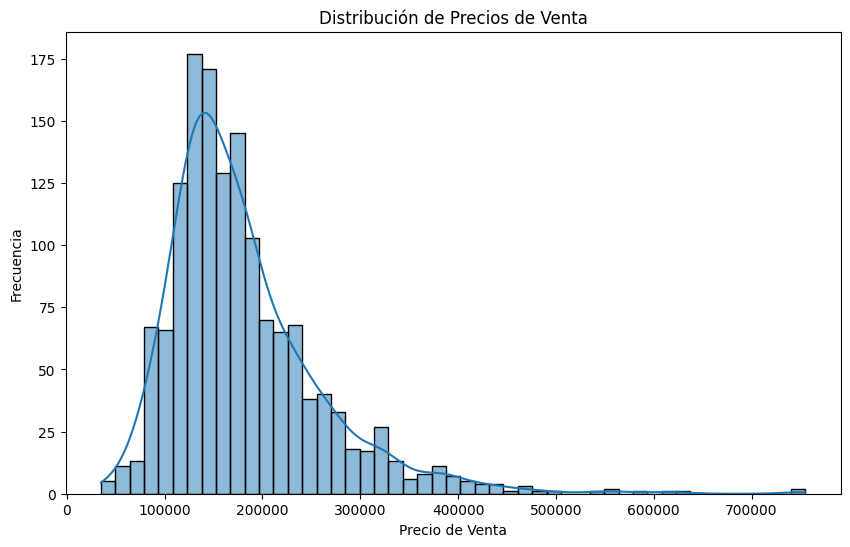

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

## ¿Cómo se correlaciona el precio de venta con otras variables numéricas, como el tamaño del lote, el área habitable, el número de habitaciones?

In [130]:
numeric_vars = ['LotArea', 'GrLivArea', 'TotRmsAbvGrd']
correlation_matrix = df[['SalePrice'] + numeric_vars].corr()
print("Matriz de correlación con variables numéricas:\n", correlation_matrix)

Matriz de correlación con variables numéricas:
               SalePrice   LotArea  GrLivArea  TotRmsAbvGrd
SalePrice      1.000000  0.263843   0.708624      0.533723
LotArea        0.263843  1.000000   0.263116      0.190015
GrLivArea      0.708624  0.263116   1.000000      0.825489
TotRmsAbvGrd   0.533723  0.190015   0.825489      1.000000


## ¿Cómo varía el precio de venta en función de variables categóricas como el tipo de zona de zonificación, la ubicación del vecindario, la calidad general de la vivienda?

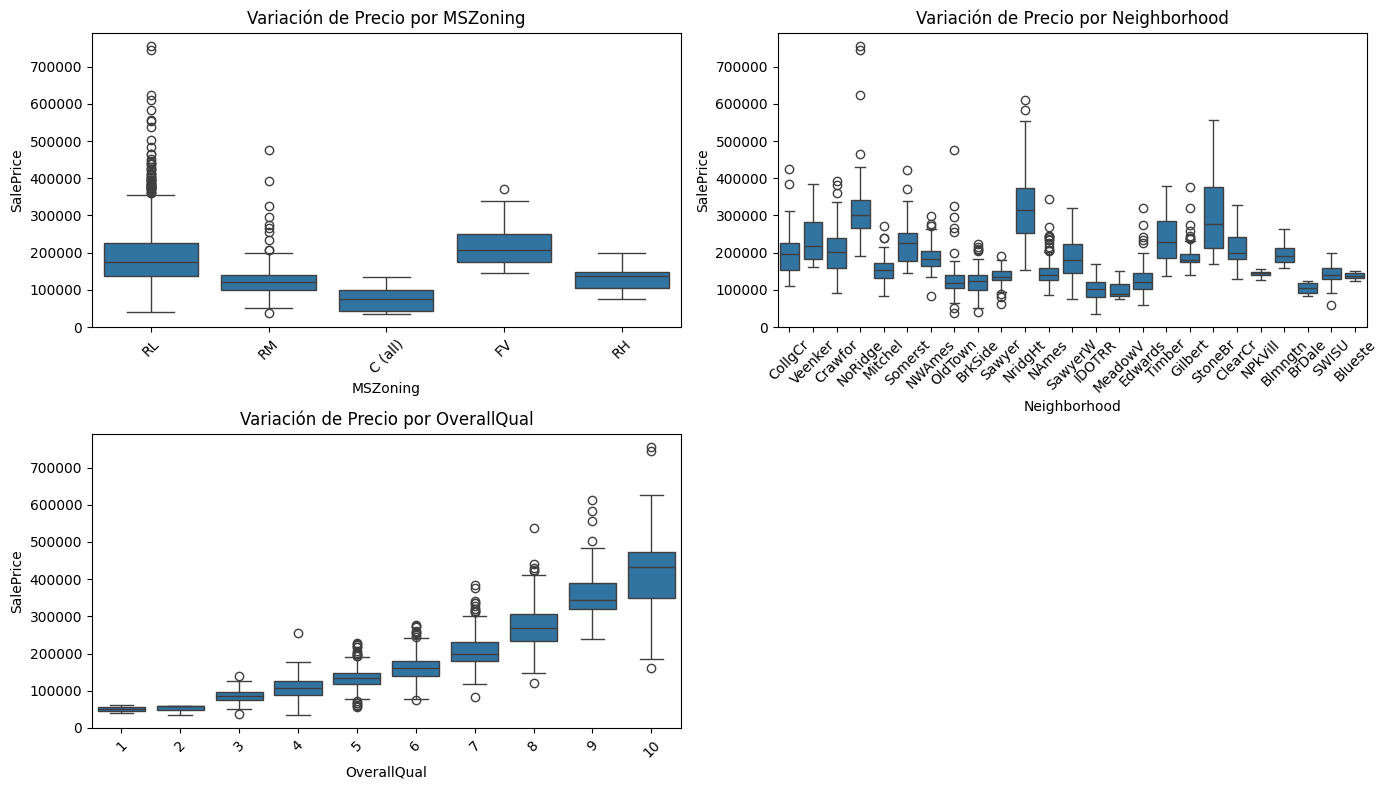

In [131]:
categorical_vars = ['MSZoning', 'Neighborhood', 'OverallQual']
plt.figure(figsize=(14, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'Variación de Precio por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ¿Hay alguna relación evidente entre el precio de venta y el año de construcción o el año de remodelación?

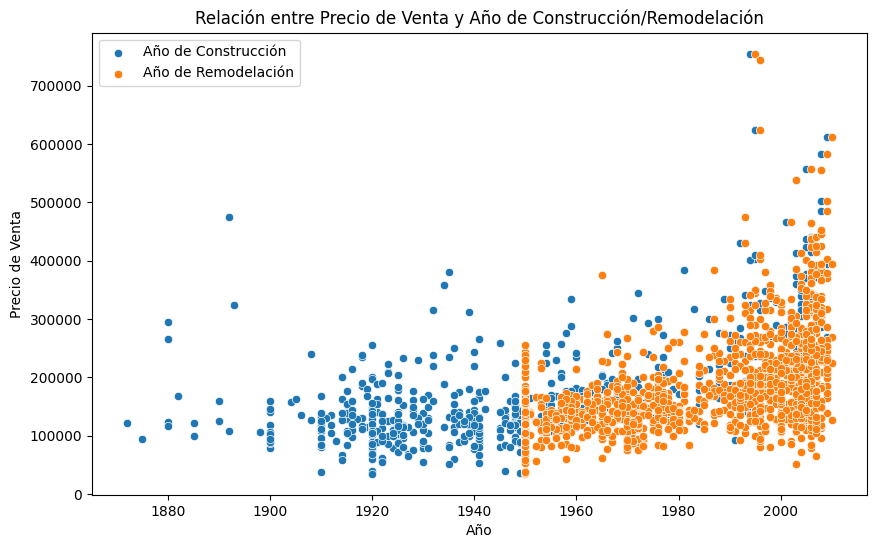

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, label='Año de Construcción')
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, label='Año de Remodelación')
plt.title('Relación entre Precio de Venta y Año de Construcción/Remodelación')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

## ¿Hay alguna relacion entre las casas que tengan piscina o no?

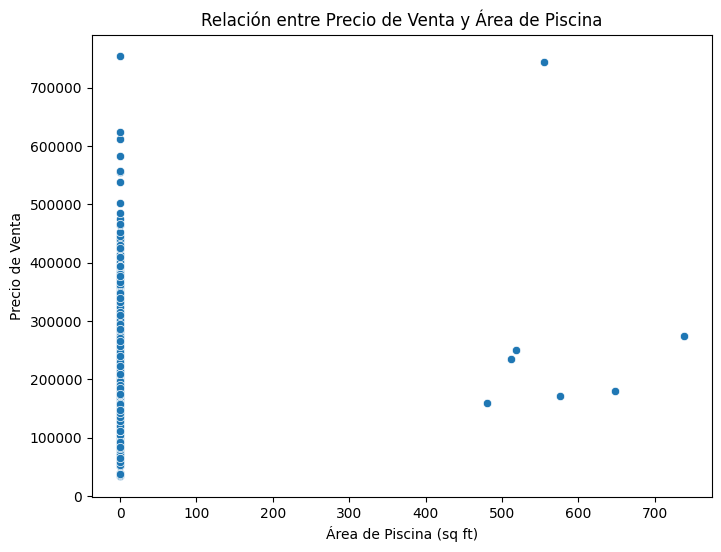

In [133]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title('Relación entre Precio de Venta y Área de Piscina')
plt.xlabel('Área de Piscina (sq ft)')
plt.ylabel('Precio de Venta')
plt.show()

### Se puede ver que realmente el tener o no piscina no afecta al precio de las casas.

## Descripción de variables
- MSSubClass: Clasificación de la propiedad según el tipo de construcción.
- MSZoning: Clasificación de la zona general.
- LotFrontage: Longitud de la calle conectada a la propiedad.
- LotArea: Tamaño del lote en pies cuadrados.
- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames.
- OverallQual: Calidad y acabado general de la casa.
- OverallCond: Calificación general del estado de la casa.
- YearBuilt: Fecha original de construcción.
- TotalBsmtSF: Total de pies cuadrados del sótano.
- GrLivArea: Área habitable sobre el nivel del suelo en pies cuadrados.
- FullBath: Número total de baños completos.
- HalfBath: Número total de baños medios (lavabos y retretes).
- BedroomAbvGr: Número total de dormitorios sobre el nivel del sótano.
- KitchenAbvGr: Número total de cocinas.
- GarageCars: Capacidad para automóviles en el garaje.
- GarageArea: Área del garaje en pies cuadrados.

## Data Split

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [135]:
features = [
    'MSSubClass',  'LotFrontage', 'LotArea', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea'
]
features_df = df[features]
features_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea
0,60,65.0,8450,7,5,2003,856,1710,2,1,3,1,2,548
1,20,80.0,9600,6,8,1976,1262,1262,2,0,3,1,2,460
2,60,68.0,11250,7,5,2001,920,1786,2,1,3,1,2,608


In [136]:
scaled_df = scaler.fit_transform(features_df[features])
scaled_df = pd.DataFrame(scaled_df, columns=features)
scaled_df['SalePrice'] = df['SalePrice']
scaled_df = scaled_df.dropna()
scaled_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,-0.459303,0.370333,0.789741,1.227585,0.163779,-0.211454,0.311725,0.351000,208500
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,0.466465,-0.482512,0.789741,-0.761621,0.163779,-0.211454,0.311725,-0.060731,181500
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,-0.313369,0.515013,0.789741,1.227585,0.163779,-0.211454,0.311725,0.631726,223500


In [137]:
#PARA UNA VARIABLE
from sklearn.model_selection import train_test_split

X = scaled_df[['GrLivArea']]
y = scaled_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)

In [138]:
#PARA TODAS LAS VARIABLES
X_all = scaled_df.drop('SalePrice', axis=1)
y_all = scaled_df['SalePrice']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=21562)

## Regresión de una variable

In [139]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

classifier_preds = classifier.predict(X_test)

In [140]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, classifier_preds)
print('R²:', r2)

R²: -0.1085089281519398


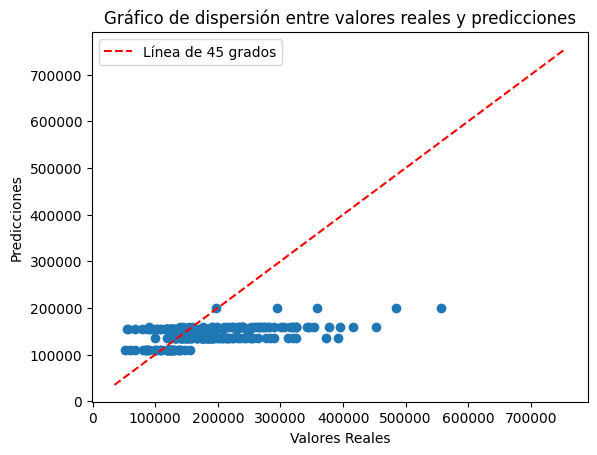

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, classifier_preds)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión entre valores reales y predicciones')

x_line = np.linspace(min(min(y_test), min(classifier_preds)), max(max(y), max(classifier_preds)), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Línea de 45 grados')

plt.legend()
plt.show()


## Regresión de todas las variables

In [141]:
all_classifier = LogisticRegression()
all_classifier.fit(X_train_all, y_train_all)

all_classifier_preds = all_classifier.predict(X_test_all)

In [142]:
r2_all = r2_score(y_test_all, all_classifier_preds)
print('R²:', r2_all)

R²: 0.7279209594767204


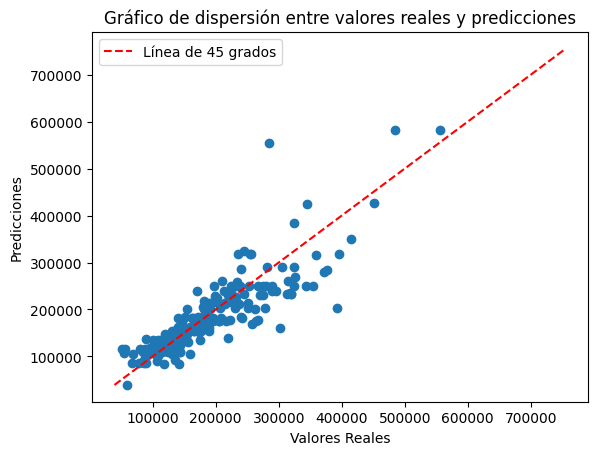

In [148]:
plt.scatter(y_test_all, all_classifier_preds)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión entre valores reales y predicciones')

x_line = np.linspace(min(min(y_test_all), min(all_classifier_preds)), max(max(y), max(all_classifier_preds)), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Línea de 45 grados')

plt.legend()
plt.show()


## Multicolinealidad

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_all.columns
vif_data["VIF"] = [variance_inflation_factor(X_all.values, i) for i in range(X_all.shape[1])]
vif_data

,Variable,VIF
0,MSSubClass,1.577393
1,LotFrontage,1.711444
2,LotArea,1.295238
3,OverallQual,3.175500
4,OverallCond,1.276532
5,YearBuilt,2.924954
6,TotalBsmtSF,2.306481
7,GrLivArea,4.807270
8,FullBath,2.680832
9,HalfBath,1.749670


### Analizando los resultados del factor de inflación de la varianza (VIF), no parece haber multicolinealidad. Usualmente esta se presenta para valores mayores a , mientras los mayores para las variables escogidas son de 5.3 y 5.5.

## Overfitting

In [153]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_all, y_train_all)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_all, y_train_all)

Ridge(alpha=0.1)

In [154]:
lasso_preds = lasso_model.predict(X_test_all)
ridge_preds = ridge_model.predict(X_test_all)

r2_lasso = r2_score(y_test_all, lasso_preds)
r2_ridge = r2_score(y_test_all, ridge_preds)
print('R² Lasso:', r2_lasso)
print('R² Ridge:', r2_ridge)

R² Lasso: 0.8320242710354618
R² Ridge: 0.832024418730299


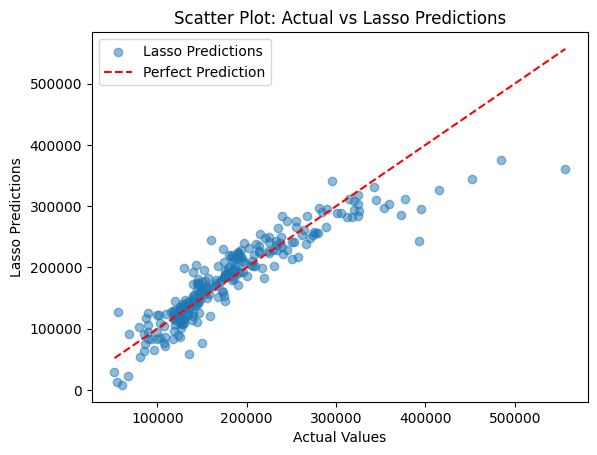

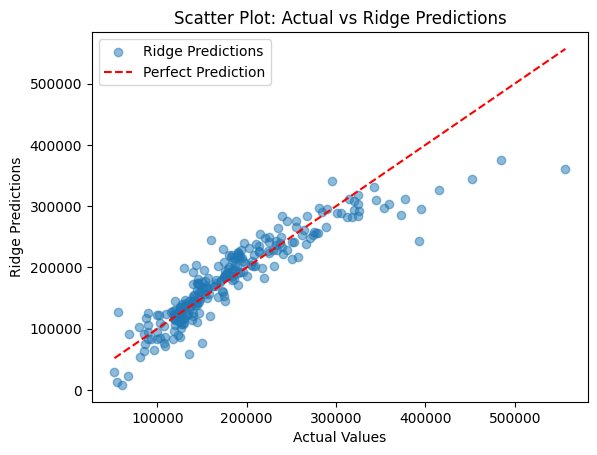

In [155]:

plt.scatter(y_test_all, lasso_preds, label='Lasso Predictions', alpha=0.5)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Lasso Predictions')
plt.title('Scatter Plot: Actual vs Lasso Predictions')
plt.legend()
plt.show()


plt.scatter(y_test_all, ridge_preds, label='Ridge Predictions', alpha=0.5)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Ridge Predictions')
plt.title('Scatter Plot: Actual vs Ridge Predictions')
plt.legend()
plt.show()


### No se podía verificar el overfitting del primer modelo solo con la métrica utilizada, por lo que se realizaron otros dos modelos, Lasso y Ridge. La característica de estos es que penalizan los coeficientes de las variables según un valor alpha, evitando el overfitting. Ambos modelos obtuvieron un valor de la métrica R2 aún mayor que el primer modelo, por lo que se puede decir que este no presenta el fenómeno.

## Eficiencia de los Modelos

### Todos los modelos se evaluaron con la métrica R2. El primero modelo (el de una variable) obtuvo un resultado pésimo, ya que una sola variable no es suficiente para obtener una predicción confiable. El segundo modelo obtuvo un valor razonable, de 0.73, lo que indica que la mayoría de las predicciones van acorde con la realidad. Luego los modelos utilizados para verificar el overfitting, Lazo y Ridge, obtuvieron un valor aún mayor. En resumen, tanto el modelo de regresión logística con las variables seleccionada, Lasso y Ridge obtuvieron una eficiencia alta.

## El mejor Modelo

### Tanto Lasso como Ridge tuvieron resultados muy similares con buenos valores. Cualquiera de ellos podría ser considerado el mejor para poder predecir el precio de las casas. 